In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [15]:
df = pd.read_csv(r"C:\Users\Reshm\OneDrive\Documents\points_table.csv",low_memory = False,index_col=0)

In [16]:
df.head(5)

,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
season,,,,,,,,,,,
2023,1,Gujarat Titans,GT,14,10,4,0,20,0.809,2450/268.1,2326/279.2
2023,2,Chennai Super Kings,CSK,14,8,5,1,17,0.652,2369/254.3,2232/257.5
2023,3,Lucknow Super Giants,LSG,14,8,5,1,17,0.284,2253/255.2,2216/259.3
2023,4,Mumbai Indians,MI,14,8,6,0,16,-0.044,2592/270.3,2620/272.1
2023,5,Rajasthan Royals,RR,14,7,7,0,14,0.148,2419/272.1,2389/273.2


In [17]:
df.dtypes

rank               int64
name              object
short_name        object
matchesplayed      int64
matcheswon         int64
matcheslost        int64
noresult           int64
matchpoints        int64
nrr              float64
for               object
against           object
dtype: object

In [18]:
print(df.columns)


Index(['rank', 'name', 'short_name', 'matchesplayed', 'matcheswon',
       'matcheslost', 'noresult', 'matchpoints', 'nrr', 'for', 'against'],
      dtype='object')


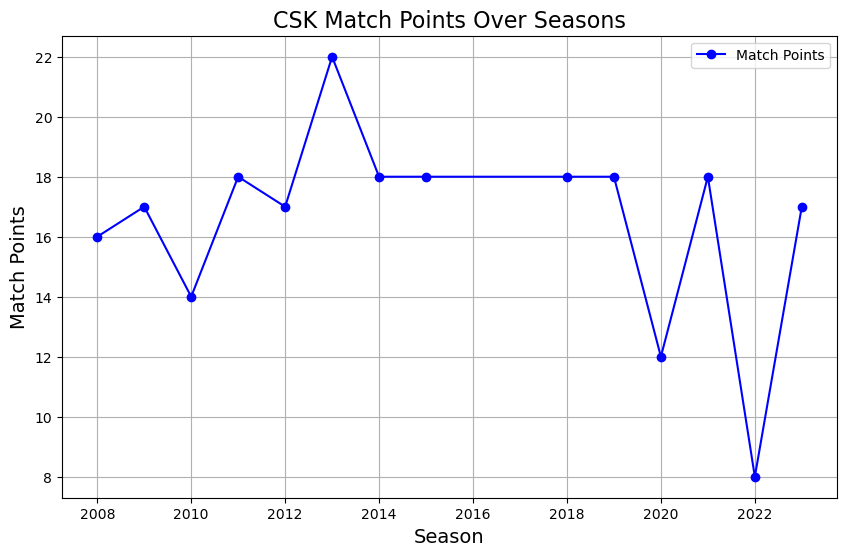

In [20]:
# Plot CSK's matchpoints across seasons
plt.figure(figsize=(10, 6))
plt.plot(csk_data['season'], csk_data['matchpoints'], marker='o', color='blue', label='Match Points')
plt.title("CSK Match Points Over Seasons", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Match Points", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


In [24]:
# Convert 'season' to a datetime format (representing the start of each year)
df['season'] = pd.to_datetime(df['season'], format='%Y')

# Set 'season' as the index
df = df.set_index('season')

In [25]:
# Check for stationarity using the ADF test
result = adfuller(df['matchpoints'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If the p-value > 0.05, the series is non-stationary, so we need to difference it
if result[1] > 0.05:
    print("The series is not stationary. Differencing the data...")

    # Apply differencing to make the series stationary
    df['matchpoints_diff'] = df['matchpoints'].diff().dropna()
    print("Differenced Data:", df['matchpoints_diff'].head())


ADF Statistic: -3.878831267514237
p-value: 0.0021962801590496733


In [26]:
# Fit ARIMA model on the original or differenced data
model = ARIMA(df['matchpoints'] if result[1] <= 0.05 else df['matchpoints_diff'].dropna(), order=(1, 1, 1))  # You can adjust (p,d,q)
model_fit = model.fit()

# Display ARIMA model summary
print(model_fit.summary())


C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reshm\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:            matchpoints   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -375.139
Date:                Wed, 27 Nov 2024   AIC                            756.277
Time:                        15:13:25   BIC                            764.993
Sample:                             0   HQIC                           759.819
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3579      0.080      4.489      0.000       0.202       0.514
ma.L1         -0.9999     21.975     -0.046      0.964     -44.070      42.070
sigma2        14.7152    322.913      0.046      0.9

In [27]:
# Forecast for the next 5 seasons (adjust `steps` as needed)
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame to display the forecasted data
future_seasons = [2024 + i for i in range(forecast_steps)]
forecast_df = pd.DataFrame({'season': future_seasons, 'forecasted_matchpoints': forecast})

print(forecast_df)


     season  forecasted_matchpoints
136    2024               10.578632
137    2025               12.933450
138    2026               13.776356
139    2027               14.078074
140    2028               14.186074


C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


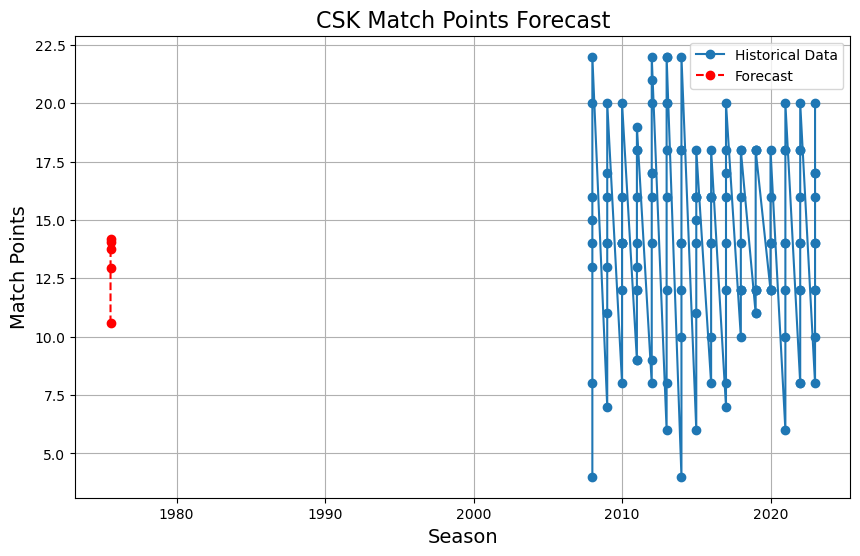

In [28]:
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(df.index, df['matchpoints'], marker='o', label='Historical Data')

# Plot forecasted data
plt.plot(future_seasons, forecast, marker='o', linestyle='--', color='red', label='Forecast')

# Set plot labels and title
plt.title("CSK Match Points Forecast", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Match Points", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


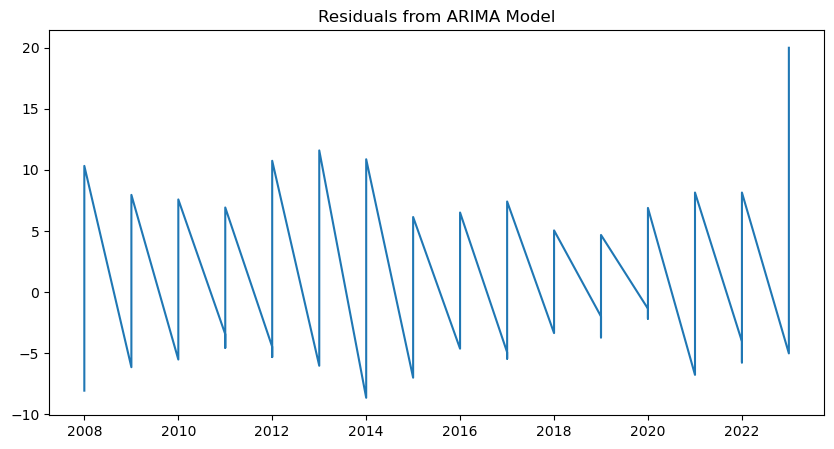

In [29]:
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals from ARIMA Model")
plt.show()


In [31]:
# Generate the forecast with confidence intervals
forecast = model_fit.get_forecast(steps=5)  # Forecast next 5 steps
forecast_values = forecast.predicted_mean  # Forecasted values
conf_int = forecast.conf_int(alpha=0.05)   # 95% confidence intervals

# Print forecast and confidence intervals
print("Forecasted Match Points:")
print(forecast_values)
print("\nConfidence Intervals:")
print(conf_int)


Forecasted Match Points:
136    10.578632
137    12.933450
138    13.776356
139    14.078074
140    14.186074
Name: predicted_mean, dtype: float64

Confidence Intervals:
     lower matchpoints  upper matchpoints
136           3.032959          18.124306
137           4.900545          20.966355
138           5.676619          21.876093
139           5.967482          22.188666
140           6.073258          22.298890


C:\Users\Reshm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
import pandas as pd

forecasted_data = {
    'season': [2024, 2025, 2026, 2027, 2028],
    'forecasted_matchpoints': [10.578632, 12.933450, 13.776356, 14.078074, 14.186074]
}

forecast_df = pd.DataFrame(forecasted_data)
forecast_df.to_csv('forecasted_csk_matchpoints.csv', index=False)
